# Introduction

DSCI 552 - Machine Learning for Data Science

Homework 3

Matheus Schmitz

USC ID: 5039286453

# Imports

In [1]:
# tqdm creates a loading bar for loops
# Extremely useful when your loop takes long
!pip install tqdm

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Progress bar
from tqdm.notebook import tqdm

# Metrics
from sklearn.metrics import roc_auc_score

# OS
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Auxilary functions to facilitate plotting classification results
# Based on scikit-learn documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve

def plot_cm(true_onehot, pred_probs, classes):
    # Dictionaries to store data
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    # Coerce inputs to np.array
    true_onehot = np.asarray(true_onehot)
    pred_probs = np.asarray(pred_probs)
    classes = np.asarray(classes)
    N_CLASSES = len(classes)
    # Extract true and predicted labels
    pred_labels = classes[np.argmax(pred_probs, axis=1)]
    true_labels = classes[np.argmax(true_onehot, axis=1)]
    # Get Confusion Matrix and plot
    conf_mat = confusion_matrix(true_labels, pred_labels, labels=classes)
    #plt.axis('equal')
    sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, square=True, cbar=False)
    plt.title('Confusion Matrix', pad = 20, fontweight='bold')
    plt.ylabel('True Emotion', fontsize = 12, labelpad = 10)
    plt.xlabel('Predicted Emotion', fontsize = 12, labelpad = 10)

def plot_roc_multiclass(true_onehot, pred_probs, classes):
    # Dictionaries to store data
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    # Coerce inputs to np.array
    true_onehot = np.asarray(true_onehot)
    pred_probs = np.asarray(pred_probs)
    classes = np.asarray(classes)
    N_CLASSES = len(classes)
    # For each class, get the fpr, tpr, thresholds and auc
    for i in range(N_CLASSES):
        fpr[i], tpr[i], thresholds[i] = roc_curve(true_onehot[:, i], pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Generate multilabel colors with pylab
    class_colors = []
    cm = pylab.get_cmap('nipy_spectral')
    for i in range(len(classes)):
        color = cm(1.*i/N_CLASSES)
        class_colors.append(color)
    # Plot the class-stratified ROCs
    plt.axis('square')
    for i, color in zip(range(N_CLASSES), class_colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=3, label=f'{classes[i]} (area = {roc_auc[i]:.2f})', alpha=0.7)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.3)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize = 12, labelpad = 10)
    plt.ylabel('True Positive Rate', fontsize = 12, labelpad = 10)
    plt.title('Multi-Class ROC Curve', pad = 20, fontweight='bold')
    legend = plt.legend()
    legend._legend_box.align = "right"
    plt.legend(loc="lower right")

def plot_roc_overall(true_onehot, pred_probs, classes):
    # Coerce inputs to np.array
    true_onehot = np.asarray(true_onehot)
    pred_probs = np.asarray(pred_probs)
    classes = np.asarray(classes)
    N_CLASSES = len(classes)
    # Compute global (micro-average) ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(true_onehot.ravel(), pred_probs.ravel())
    roc_auc = auc(fpr, tpr)
    # Plot the model overall ROC
    plt.axis('square')
    plt.plot(fpr, tpr, label=f'MODEL OVERALL (area = {roc_auc:.2f})', color='deeppink', lw=5)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.3)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize = 12, labelpad = 10)
    plt.ylabel('True Positive Rate', fontsize = 12, labelpad = 10)
    plt.title('Overall ROC Curve', pad = 20, fontweight='bold')
    legend = plt.legend()
    legend._legend_box.align = "right"
    plt.legend(loc="lower right")

def plot_prec_recall_curve(true_onehot, pred_probs, classes):
    # Dictionaries to store data
    precision = dict()
    recall = dict()
    thresholds = dict()
    auprc = dict()
    # Coerce inputs to np.array
    true_onehot = np.asarray(true_onehot)
    pred_probs = np.asarray(pred_probs)
    classes = np.asarray(classes)
    N_CLASSES = len(classes)
    # For each class, get the fpr, tpr, thresholds and auc
    for i in range(N_CLASSES):
        precision[i], recall[i], thresholds[i] = precision_recall_curve(true_onehot[:, i], pred_probs[:, i])
        auprc[i] = auc(recall[i], precision[i])
    # Generate multilabel colors with pylab
    class_colors = []
    cm = pylab.get_cmap('nipy_spectral')
    for i in range(len(classes)):
        color = cm(1.*i/N_CLASSES)
        class_colors.append(color)
    # Plot the class-stratified ROCs
    plt.axis('square')
    for i, color in zip(range(N_CLASSES), class_colors):
        plt.plot(recall[i], precision[i], color=color, lw=3, label=f'{classes[i]} (area = {auprc[i]:.2f})', alpha=0.7)
    plt.plot([1, 0], [0, 1], 'k--', lw=2, alpha=0.3)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('Recall', fontsize = 12, labelpad = 10)
    plt.ylabel('Precision', fontsize = 12, labelpad = 10)
    plt.title('Precision-Recall Curve', pad = 20, fontweight='bold')
    legend = plt.legend()
    legend._legend_box.align = "left"
    plt.legend(loc="lower left")

def plot_classification_results(true_onehot, pred_probs, classes):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
    fig.sca(axs[0][0])
    plot_cm(true_onehot, pred_probs, classes)
    fig.sca(axs[0][1])
    plot_prec_recall_curve(true_onehot, pred_probs, classes)
    fig.sca(axs[1][0])
    plot_roc_overall(true_onehot, pred_probs, classes)
    fig.sca(axs[1][1])
    plot_roc_multiclass(true_onehot, pred_probs, classes)
    fig.tight_layout(h_pad=3, w_pad=-30)
    fig.show()

# (1) Time Series Classification

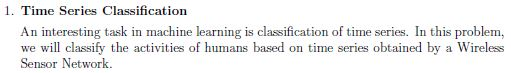

## (a) Download the dataset

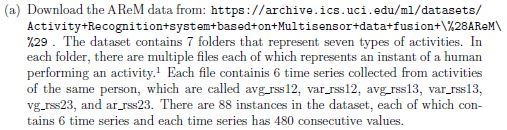

In [4]:
col_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

In [5]:
# Get all csv files

all_files = []

for rootname, dirnames, filenames in os.walk('../data'):
    for filename in filenames:
        filepath = os.path.join(rootname, filename)
        filepath = filepath.replace('\\', '/')
        all_files.append(filepath)
        
len(all_files)

88

## (b) Train-Test Split

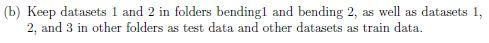

In [6]:
# List train and test datasets
test_datasets = ['../data/bending1/dataset1.csv',
                 '../data/bending1/dataset2.csv',
                 '../data/bending2/dataset1.csv',
                 '../data/bending2/dataset2.csv',
                 '../data/cycling/dataset1.csv',
                 '../data/cycling/dataset2.csv',
                 '../data/cycling/dataset3.csv',
                 '../data/lying/dataset1.csv',
                 '../data/lying/dataset2.csv',
                 '../data/lying/dataset3.csv',
                 '../data/sitting/dataset1.csv',
                 '../data/sitting/dataset2.csv',
                 '../data/sitting/dataset3.csv',
                 '../data/standing/dataset1.csv',
                 '../data/standing/dataset2.csv',
                 '../data/standing/dataset3.csv',
                 '../data/walking/dataset1.csv',
                 '../data/walking/dataset2.csv',
                 '../data/walking/dataset3.csv',]

train_datasets = [fpath for fpath in all_files if fpath not in test_datasets]

print(f'Tally of test datasets: {len(test_datasets)}')
print(f'Tally of train datasets: {len(train_datasets)}')  

Tally of test datasets: 19
Tally of train datasets: 69


Some CSVs are separated by commas "," while others are separated by spaces " ", so pandas has to be told to consider two separation criteria. This can be done with ``sep=r'\s+|,'``, where ``\s+`` means to use one or more spaces, and ``,`` means to use a comma as separator.

In [7]:
df_test = pd.DataFrame()

for file in test_datasets:
    tmp = pd.read_csv(file, skiprows=5, header=None, sep=r'\s+|,')
    df_test = df_test.append(tmp, ignore_index=True)
    
df_test.columns = col_names
df_test.shape

(9120, 7)

In [8]:
df_test.tail(3)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
9117,119250,33.00,7.35,14.60,3.14,13.00,5.70
9118,119500,31.67,1.25,11.00,6.16,19.25,2.17
9119,119750,30.75,10.21,11.75,1.09,18.50,3.20


In [9]:
df_train = pd.DataFrame()

for file in train_datasets:
    tmp = pd.read_csv(file, skiprows=5, header=None, sep=r'\s+|,')
    df_train = df_train.append(tmp, ignore_index=True)
    
df_train.columns = col_names
df_train.shape

(33119, 7)

One of the datasets has one fewer row.


"../data/sitting/dataset8.csv" shape is (479, 7).


The missing row is between lines 59 and 60. The time skips form 13250ms to 13750ms, skipping the expected 13500 measurement.

In [10]:
df_train.tail(3)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
33116,119250,37.80,7.68,14.20,2.48,17.25,0.83
33117,119500,33.75,1.30,15.75,5.21,16.50,2.69
33118,119750,32.67,3.09,18.67,0.47,14.00,3.16


## (c) Feature Extraction

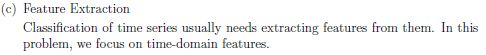

### (i) Research Time-Domain Features

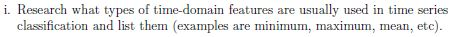

The most simple features which can be extracted from the data are those regarding it's distribution, known as descriptive statistics. Examples are: **mean, median, standard deviation, minimum and maximum, quartiles or percentiles, as well as skewness and kurtosis.**

Some slightly more advances features are those employed by ARIMA models and their evolutions, such as SARIMAX, which employes: Seasonality (S); Autoregression (AR); Integration (I); Moving Average (MA); Exogenous Variables (X).



There are three main classes of features for time series analysis:
* **Date Time Features:** Refers to features the the individual observations;
* **Lag Features:** Refers to features comparing changes from an observation regarding previous ones;
* **Window Features:** Refers to features obtained from considering multiple observations at one, using a sliding time window.

Wikipedia has a comprehensive listing with further references:

https://en.wikipedia.org/wiki/Time_series#Measures

Another source which balances comprehensiveness and accessibility is the paper which Facebook published together with it's Prophet algorithm for time series forecasting:

https://peerj.com/preprints/3190.pdf

### (ii) Extract the Time-Domain Features

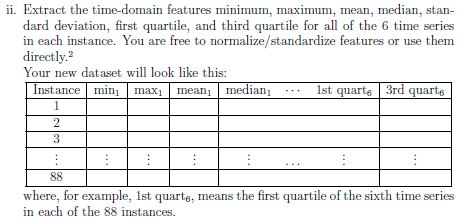

In [11]:
table_cols = ['min1', 'max1', 'mean1', 'median1', 'std1', 'firstq1', 'thirdq1',
              'min2', 'max2', 'mean2', 'median2', 'std2', 'firstq2', 'thirdq2',
              'min3', 'max3', 'mean3', 'median3', 'std3', 'firstq3', 'thirdq3',
              'min4', 'max4', 'mean4', 'median4', 'std4', 'firstq4', 'thirdq4',
              'min5', 'max5', 'mean5', 'median5', 'std5', 'firstq5', 'thirdq5',
              'min6', 'max6', 'mean6', 'median6', 'std6', 'firstq6', 'thirdq6']
len(table_cols)

42

In [12]:
# Create a master list containing all features for all csv's, then convert it to a dataframe
# The list will follow the order of 'table_cols', listing all attributes of the first feature before going to the second

master_list = []

# Loop through all CSVs
for file in all_files:
    
    # Read the CSV and drop the 'time' column
    tmp = pd.read_csv(file, skiprows=5, header=None, sep=r'\s+|,')
    tmp.columns = col_names
    tmp.drop('time', inplace=True, axis=1)
    
    # Extract the features from each variable in the CSV
    ft_min = pd.Series(tmp.min().values)
    ft_max = pd.Series(tmp.max().values)
    ft_mean = pd.Series(tmp.mean().values)
    ft_median = pd.Series(tmp.median().values)
    ft_std = pd.Series(tmp.std().values)
    ft_firstq = pd.Series(tmp.quantile(0.25).values)
    ft_thirdq = pd.Series(tmp.quantile(0.75).values)
    
    # Put all the features in a dataframe
    # Each of the features (the 'ft_' pd.Series from above) will be a row, the columns will be each of the 6 variables in the CSV 
    df_tmp = pd.DataFrame(data=[ft_min, ft_max, ft_mean, ft_median, ft_std, ft_firstq, ft_thirdq])
    
    # The reason for converting to a dataframe of this shape is so that the .melt() method can be used, 
    # this allows the sequence to be converted...
    # from: the .min() of all variables, followed by the .max() of all varibles, then the .mean() of all and so on - this is how it would have been were I to merely append all 'ft_' pd.Series together
    # to: all features from variable 1, then all features from variable 2, then from variable 3 and so on - which is the desired format
    # The resulting pd.Series is now a 42-item long list ordered by CSV variable, and not by 'ft_' feature - it will represent one row in the final dataframe
    df_tmp = df_tmp.melt()
    
    # Melt creates two columns, one named 'varible' which has in each row the name of the column that was melted
    # The other column is 'value' which has the value associated with the previous match (at.[row, col]) 
    # Keeping only the series of values, ordered by CSV variable
    df_tmp = pd.Series(df_tmp['value'])
    
    # Then append the data already in the correct order to the master_list which will be used to make the final dataframe
    master_list.append(df_tmp)

# Now that the loop is over, create the final dataframe from the master_list 
df_features = pd.DataFrame(data=master_list)
df_features.reset_index(inplace=True, drop=True)
df_features.columns = table_cols
df_features.shape

(88, 42)

In [13]:
df_features

,min1,max1,mean1,median1,std1,firstq1,thirdq1,min2,max2,mean2,...,std5,firstq5,thirdq5,min6,max6,mean6,median6,std6,firstq6,thirdq6
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935813,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


### (iii) Build a 90% Bootsrap Confidence Interval for the Standard Deviation of each Feature

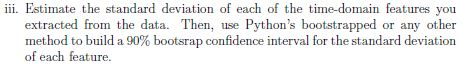

In [14]:
%%time
# Calculate the standard deviation for each feature from the dataset
df_column_stds = pd.DataFrame(df_features.std(), columns=['Standard Deviation'])

# Create a dataframe to store all bootstrapped std samples
bootstrap_df = pd.DataFrame()

# Run 1000 loops bootstrapping data
for i in range(0, 1000):
    
    # Generate a bootstrapped dataset and get it's standard deviation
    bs_std = df_features.sample(frac=1, replace=True).std()
    
    # Then append it to bootstrap_df as a column
    bootstrap_df = pd.concat([bootstrap_df, bs_std], axis=1)

# After finishing the boostraping loop, get the the 0.05 and 0.95 quantiles (0.95 - 0.05 = 90% CI)
lower_bound = bootstrap_df.quantile(q=0.05, axis=1)
upper_bound = bootstrap_df.quantile(q=0.95, axis=1)

# Then add the upper and lower bounds to the dataframe with the standard deviations
df_std_ci = pd.concat([df_column_stds, lower_bound, upper_bound], axis=1)

Wall time: 1.52 s


In [15]:
df_std_ci

,Standard Deviation,0.05,0.95
min1,9.569975,8.251400,10.787523
max1,4.394362,3.342743,5.303965
mean1,5.335718,4.700680,5.932338
median1,5.440054,4.770535,6.005406
std1,1.772153,1.565155,1.936148
firstq1,6.153590,5.576668,6.644539
thirdq1,5.138925,4.340240,5.889960
min2,0.000000,0.000000,0.000000
max2,5.062729,4.611788,5.399607
mean2,1.574164,1.394433,1.702126


### (iv) Select the Three Most Important Features

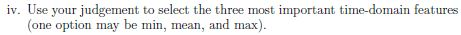

**min**, **max** and **mean** seem like a good choice for representing the data, so I'll take the advice and go with those, as they do seem to together portray a good image of the data distribution.

In [16]:
top_features = ['min1', 'max1', 'mean1',
                'min2', 'max2', 'mean2',
                'min6', 'max6', 'mean6']

## (d) Binary Classification Using Logistic Regression

### (i) Scatterplot of Bending x Non-Bending Activities

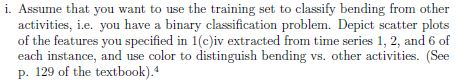

In [17]:
# This will require extracting the labels from each class
# Use list comprehension to go through all_files (a list with file paths)
# And use the folder in the file path to set the label
labels = [all_files[i].split('/')[2] for i in range(len(all_files))]

# Then create a new column on the dataframe containing the labels
df_features['label'] = labels

In [18]:
# Create a binary indicator to define if the label is for bending (1) or for something else (0)
labels_bending = [1 if 'bending' in label else 0 for label in labels]
df_features['is_bending'] = labels_bending
labels_binary_unique = ['non-bending', 'bending']

In [19]:
# Since we are at it, also attach the filepath to each sample, just in case it becomes necessary down the line
# Attach the filepatchs to each row
df_features['fpath'] = all_files
df_features.head(3)

,min1,max1,mean1,median1,std1,firstq1,thirdq1,min2,max2,mean2,...,min6,max6,mean6,median6,std6,firstq6,thirdq6,label,is_bending,fpath
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,0.0,1.92,0.570583,0.43,0.582915,0.0,1.30,bending1,1,../data/bending1/dataset1.csv
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.67,0.0,1.22,0.372438,...,0.0,3.11,0.571083,0.43,0.601010,0.0,1.30,bending1,1,../data/bending1/dataset2.csv
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,0.0,1.79,0.493292,0.43,0.513506,0.0,0.94,bending1,1,../data/bending1/dataset3.csv


In [20]:
# Train-test split

# Create a new df_test, overwriting the old one from (b)
df_test = df_features[df_features['fpath'].isin(test_datasets)]
print(f'Test dataset shape: {df_test.shape}')

# Create a new df_train, overwriting the old one from (b)
df_train = df_features[~df_features['fpath'].isin(test_datasets)]
print(f'Train dataset shape: {df_train.shape}')

Test dataset shape: (19, 45)
Train dataset shape: (69, 45)


In [21]:
# Create a training dataset with only the top features and the is_bending label
df_train_top_f = df_train[top_features]
df_train_top_f['is_bending'] = df_train['is_bending']
df_train_top_f.head(3)

,min1,max1,mean1,min2,max2,mean2,min6,max6,mean6,is_bending
2,35.0,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,1
3,33.0,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,1
4,33.0,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,1


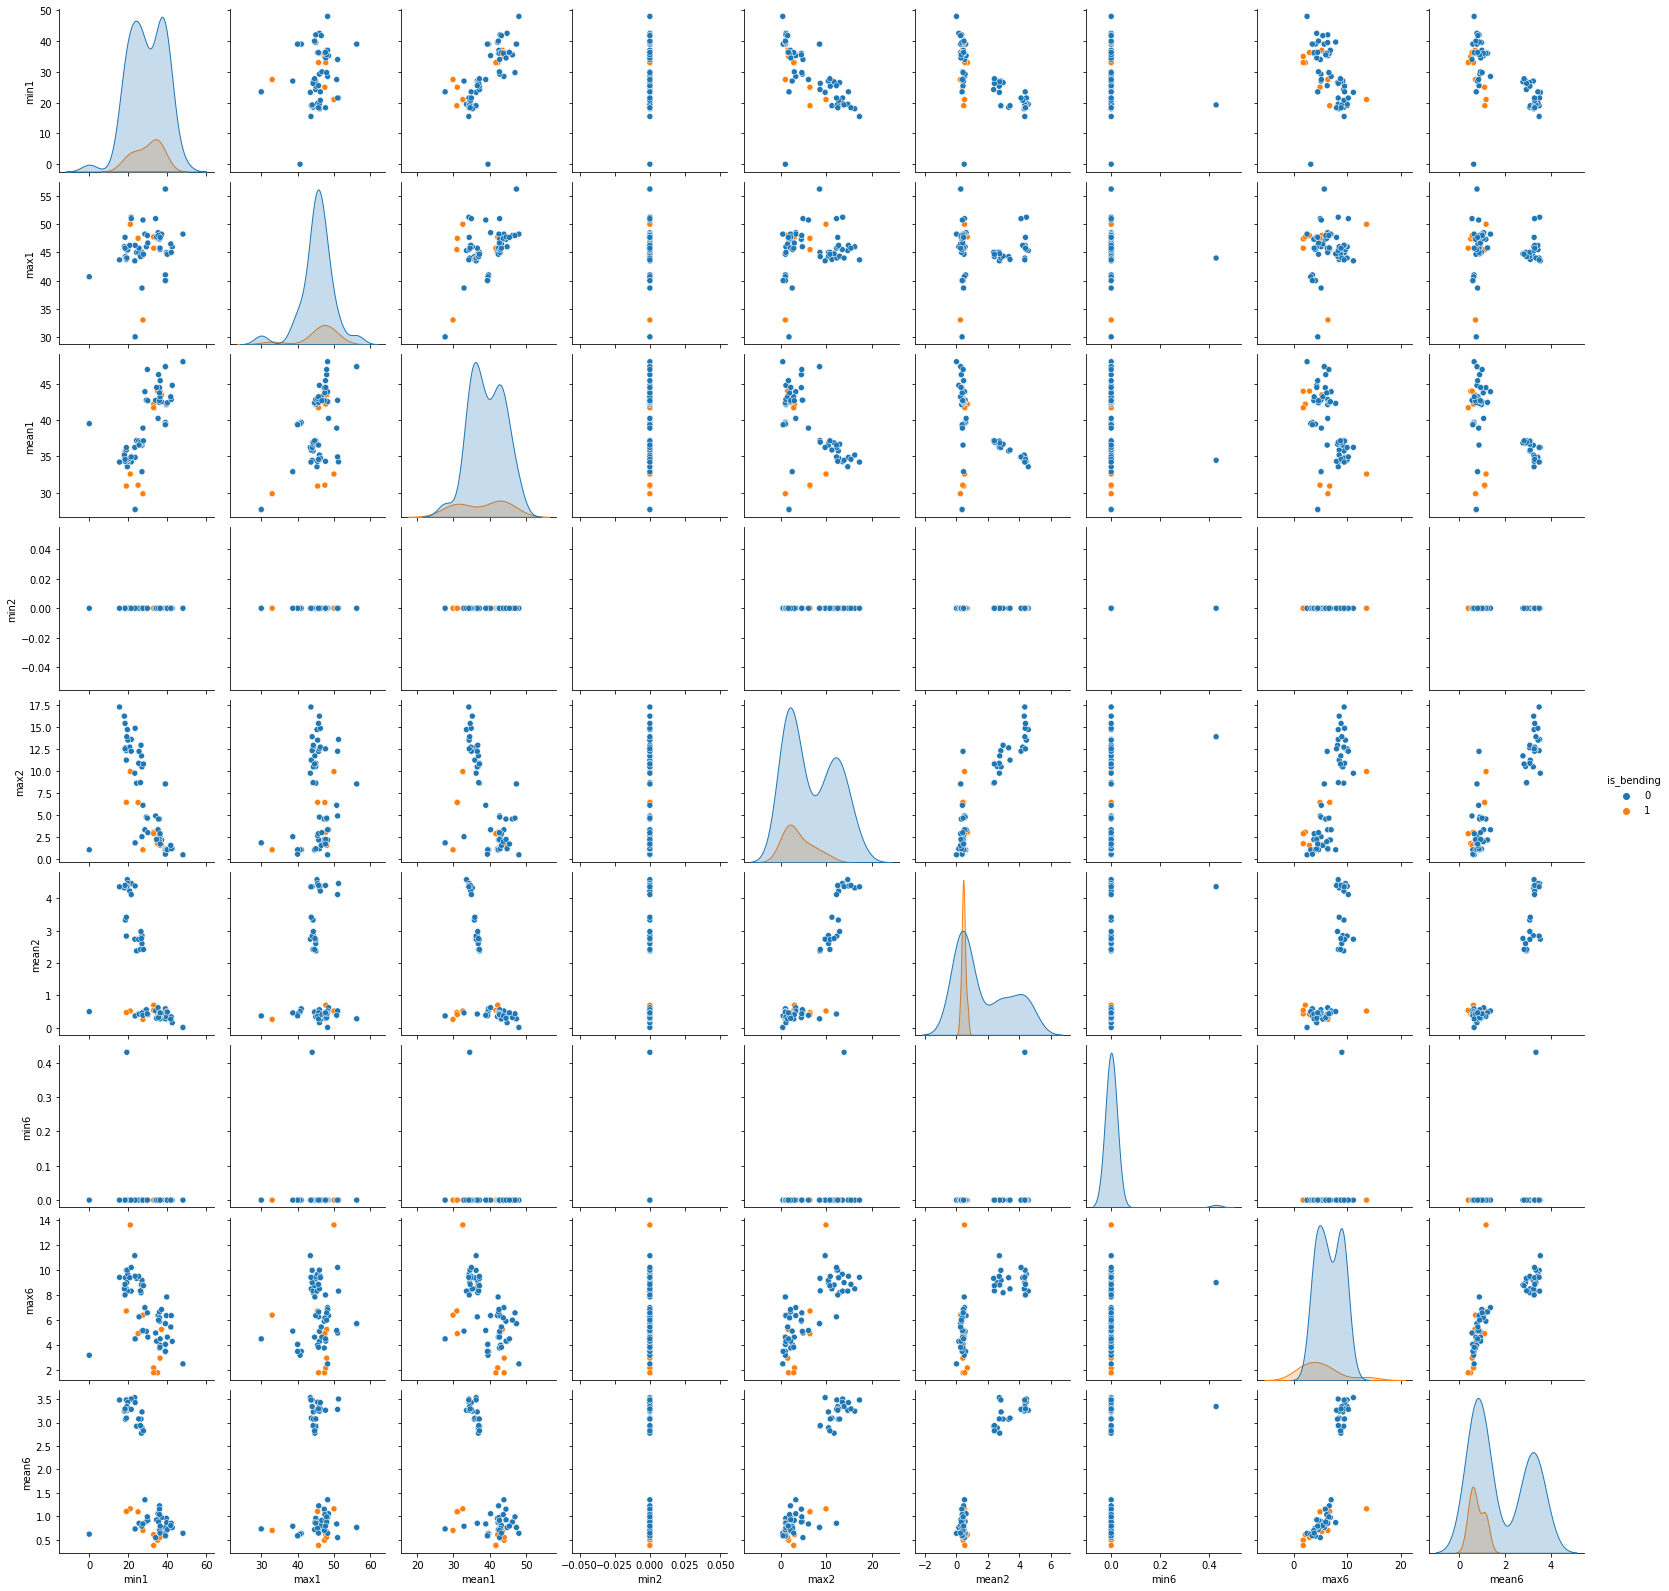

In [22]:
sns.pairplot(data=df_train_top_f, hue='is_bending')

### (ii) Break each time series in your training set into two

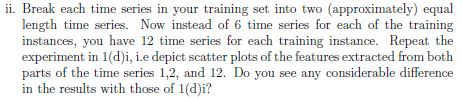

In [23]:
# We'll have 12 columns, so need to create appropriate headings
table_cols2 = ['min01', 'max01', 'mean01', 'median01', 'std01', 'firstq01', 'thirdq01',
               'min02', 'max02', 'mean02', 'median02', 'std02', 'firstq02', 'thirdq02',
               'min03', 'max03', 'mean03', 'median03', 'std03', 'firstq03', 'thirdq03',
               'min04', 'max04', 'mean04', 'median04', 'std04', 'firstq04', 'thirdq04',
               'min05', 'max05', 'mean05', 'median05', 'std05', 'firstq05', 'thirdq05',
               'min06', 'max06', 'mean06', 'median06', 'std06', 'firstq06', 'thirdq06',
               'min07', 'max07', 'mean07', 'median07', 'std07', 'firstq07', 'thirdq07',
               'min08', 'max08', 'mean08', 'median08', 'std08', 'firstq08', 'thirdq08',
               'min09', 'max09', 'mean09', 'median09', 'std09', 'firstq09', 'thirdq09',
               'min10', 'max10', 'mean10', 'median10', 'std10', 'firstq10', 'thirdq10',
               'min11', 'max11', 'mean11', 'median11', 'std11', 'firstq11', 'thirdq11',
               'min12', 'max12', 'mean12', 'median12', 'std12', 'firstq12', 'thirdq12']
len(table_cols2)

84

In [24]:
# Redoing all the previous procedure, now with changes to take the inner (tmp) dataframe from (480, 6) to (240, 12)

# Create a master list containing all features for all csv's, then convert it to a dataframe
# The list already follows the order of 'table_cols', listing all attributes of the first feature before going to the second

master_list2 = []

# Loop through all CSVs
for file in all_files:
    
    # Read the CSV 
    tmp = pd.read_csv(file, skiprows=5, header=None, sep=r'\s+|,')
    
    # Drop the first column with time data
    tmp.drop(0, axis=1, inplace=True)
    
    # Take the halfway point to split the dataframe
    cutpoint = len(tmp)//2
    
    # Make one dataframe from the first half, and one from the second half
    pt1 = tmp[:cutpoint].reset_index(drop=True)
    pt2 = tmp[cutpoint:].reset_index(drop=True)

    # Put them together as a dataframe with twice as many columns and half as many rows
    tmp = pd.concat(objs=[pt1, pt2], axis=1, ignore_index=True)
    
    # Extract the features from each variable in the dataframe
    ft_min = pd.Series(tmp.min().values)
    ft_max = pd.Series(tmp.max().values)
    ft_mean = pd.Series(tmp.mean().values)
    ft_median = pd.Series(tmp.median().values)
    ft_std = pd.Series(tmp.std().values)
    ft_firstq = pd.Series(tmp.quantile(0.25).values)
    ft_thirdq = pd.Series(tmp.quantile(0.75).values)
    
    # Put all the features in a dataframe
    # Each of the features (the 'ft_' pd.Series from above) will be a row, the columns will be each of the 6 variables in the CSV 
    df_tmp = pd.DataFrame(data=[ft_min, ft_max, ft_mean, ft_median, ft_std, ft_firstq, ft_thirdq])
    
    # The reason for converting to a dataframe of this hape is so that the .melt() method can be used, 
    # this allows the sequence to be converted...
    # from: the .min() of all variables, followed by the .max() of all varibles, then the .mean() of all and so on - this is how it would have been were I to merely append all 'ft_' pd.Series together
    # to: all features from variable 1, then all features from variable 2, then from variable 3 and so on - which is the desired format
    # The resulting pd.Series is now a 42-item long list ordered by CSV variable, and not by 'ft_' feature - it will represent one row in the final dataframe
    df_tmp = df_tmp.melt()
    df_tmp = pd.Series(df_tmp['value'])
    
    # Then append the data already in the correct order to the master_list which will be used to make the final dataframe
    master_list2.append(df_tmp)

# Now that the loop is over, create the final dataframe from the master_list 
df_features2 = pd.DataFrame(data=master_list2)
df_features2.reset_index(inplace=True, drop=True)
df_features2.columns = table_cols2
df_features2.shape

(88, 84)

In [25]:
df_features2['label'] = df_features['label']
df_features2['is_bending'] = df_features['is_bending']
df_features2['fpath'] = df_features['fpath']
df_features2

,min01,max01,mean01,median01,std01,firstq01,thirdq01,min02,max02,mean02,...,min12,max12,mean12,median12,std12,firstq12,thirdq12,label,is_bending,fpath
0,38.00,42.33,40.946958,41.250,1.102963,40.3100,42.0000,0.0,1.22,0.375667,...,0.00,1.92,0.552167,0.430,0.510494,0.00,0.9400,bending1,1,../data/bending1/dataset1.csv
1,41.75,44.25,42.643292,42.500,0.641849,42.0000,43.3300,0.0,0.94,0.355000,...,0.00,3.11,0.533583,0.430,0.575061,0.00,0.8700,bending1,1,../data/bending1/dataset2.csv
2,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,0.00,1.50,0.388333,0.000,0.478528,0.00,0.7100,bending1,1,../data/bending1/dataset3.csv
3,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,0.00,2.18,0.586083,0.470,0.491873,0.00,0.8700,bending1,1,../data/bending1/dataset4.csv
4,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,0.00,1.50,0.347500,0.430,0.363144,0.00,0.5000,bending1,1,../data/bending1/dataset5.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,0.0,12.68,4.207958,...,0.00,9.39,3.430208,3.350,1.647979,2.17,4.4400,walking,0,../data/walking/dataset5.csv
84,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,0.0,12.21,4.217333,...,0.00,10.21,3.225917,3.085,1.665326,2.05,4.3500,walking,0,../data/walking/dataset6.csv
85,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,0.0,12.44,4.332208,...,0.00,8.01,3.274750,2.955,1.670593,2.05,4.4375,walking,0,../data/walking/dataset7.csv
86,18.33,44.00,34.836458,35.750,4.869092,32.0000,38.6900,0.0,12.38,4.257750,...,0.47,8.84,3.409458,3.110,1.707089,2.17,4.3450,walking,0,../data/walking/dataset8.csv


In [26]:
# Train-test split

# Create a new df_test, overwriting the old one from (b)
df_test2 = df_features2[df_features2['fpath'].isin(test_datasets)]
print(f'Test dataset shape: {df_test2.shape}')

# Create a new df_train, overwriting the old one from (b)
df_train2 = df_features2[~df_features2['fpath'].isin(test_datasets)]
print(f'Train dataset shape: {df_train2.shape}')

Test dataset shape: (19, 87)
Train dataset shape: (69, 87)


In [27]:
top_features2 = ['min01', 'max01', 'mean01',
                 'min02', 'max02', 'mean02',
                 'min12', 'max12', 'mean12']

In [28]:
# Create a training dataset with only the top features and the is_bending label
df_train_top_f2 = df_train2[top_features2]
df_train_top_f2['is_bending'] = df_train2['is_bending']
df_train_top_f2

,min01,max01,mean01,min02,max02,mean02,min12,max12,mean12,is_bending
2,36.50,46.50,44.057167,0.0,1.50,0.381042,0.00,1.50,0.388333,1
3,33.75,47.75,43.278875,0.0,3.00,0.673292,0.00,2.18,0.586083,1
4,33.00,45.75,41.621208,0.0,2.83,0.623083,0.00,1.50,0.347500,1
5,39.00,48.00,44.117042,0.0,1.30,0.250042,0.00,4.06,0.543875,1
6,36.67,45.00,43.486208,0.0,1.30,0.378667,0.00,2.96,0.585750,1
...,...,...,...,...,...,...,...,...,...,...
83,22.33,46.00,34.966250,0.0,12.68,4.207958,0.00,9.39,3.430208,0
84,21.50,45.67,34.737042,0.0,12.21,4.217333,0.00,10.21,3.225917,0
85,18.33,45.00,33.886458,0.0,12.44,4.332208,0.00,8.01,3.274750,0
86,18.33,44.00,34.836458,0.0,12.38,4.257750,0.47,8.84,3.409458,0


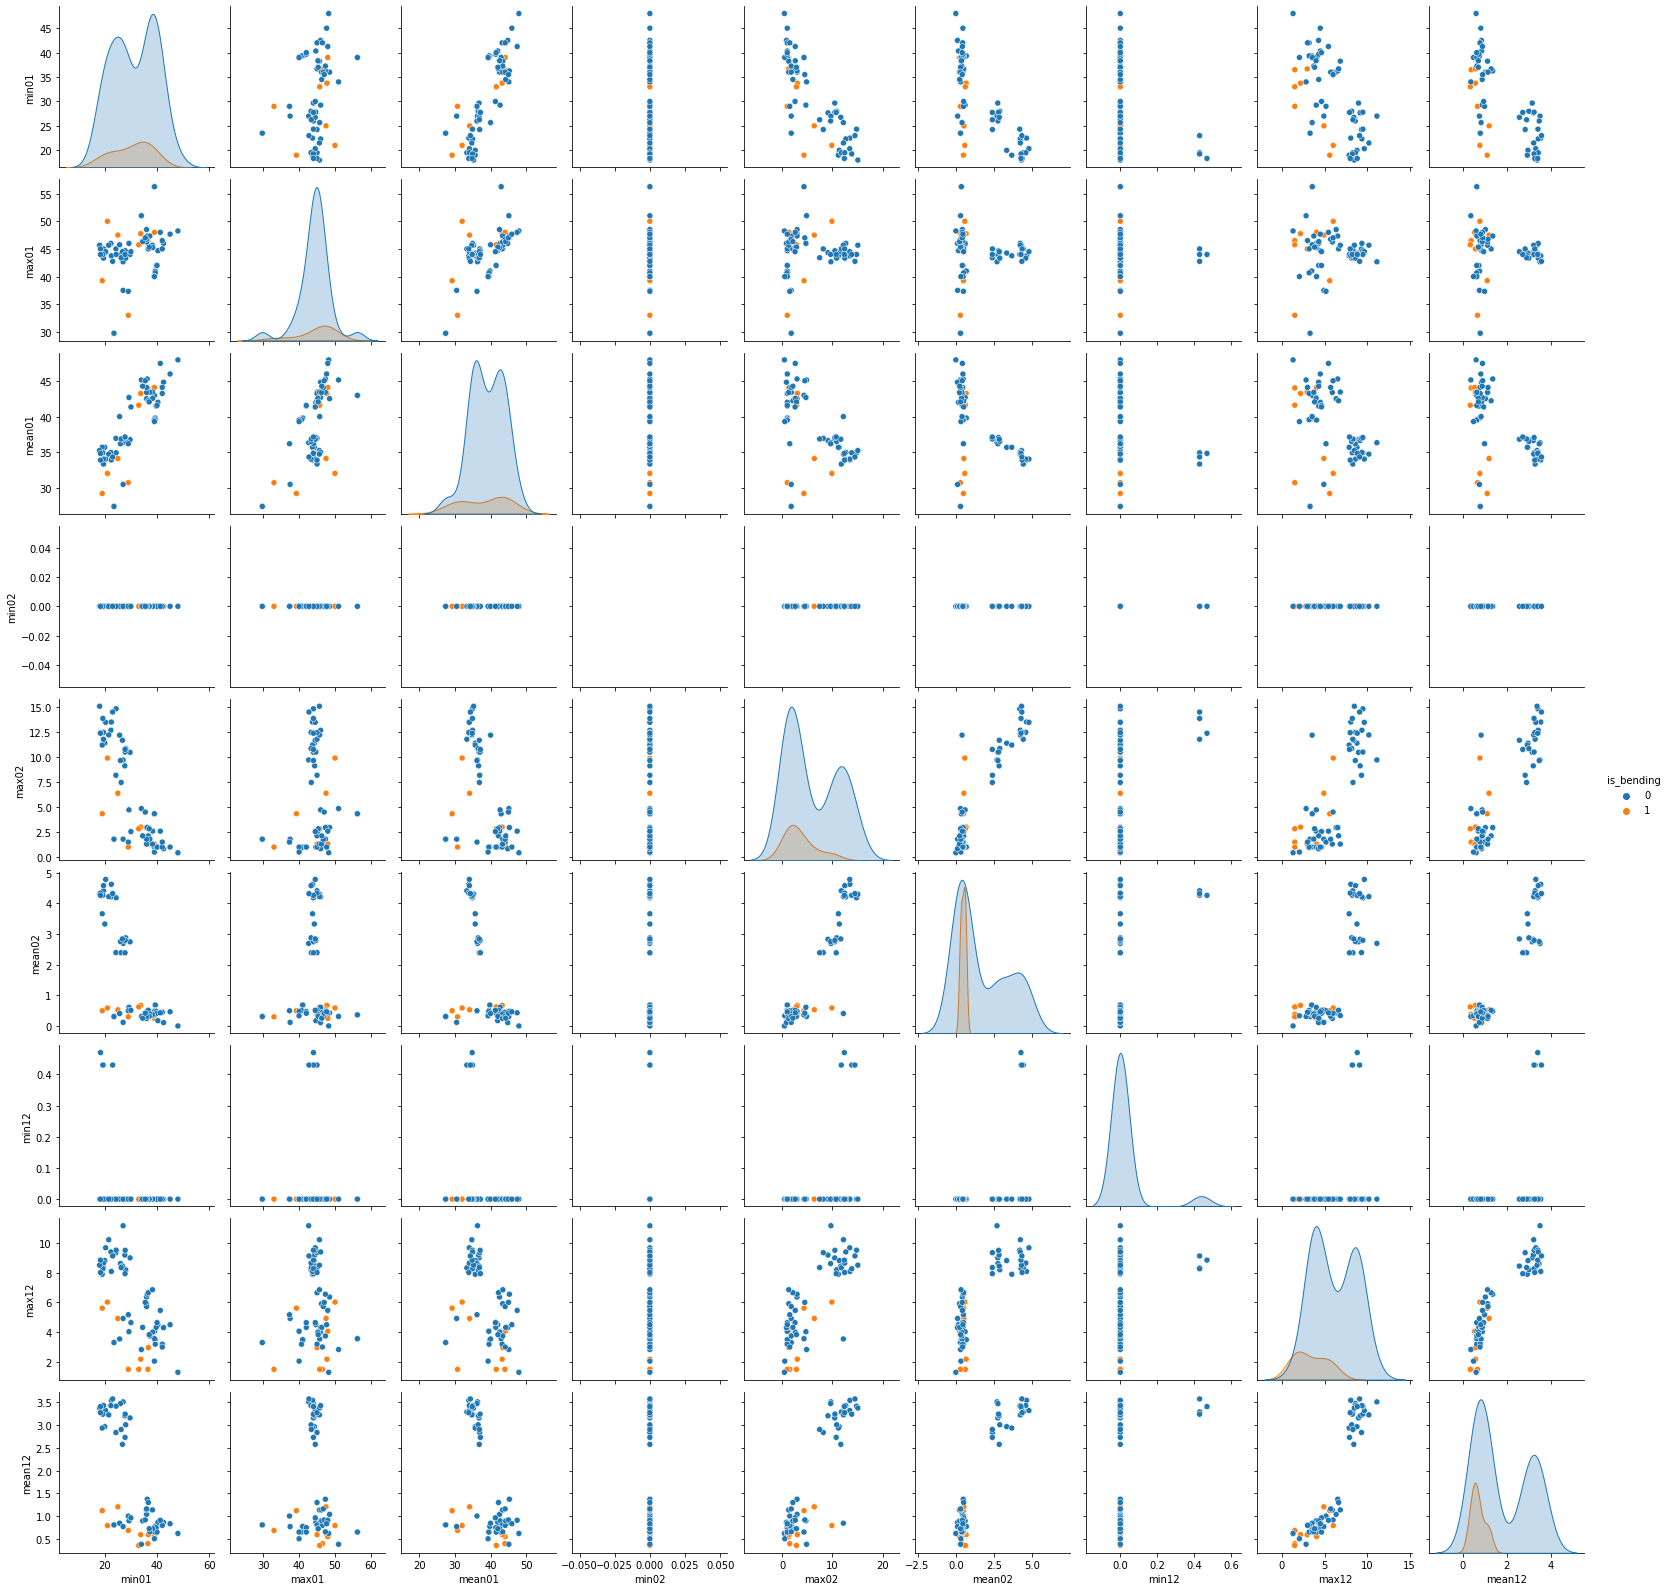

In [29]:
sns.pairplot(data=df_train_top_f2, hue='is_bending')

The pairplots from **(d) i** and **(d) ii** are highly similar. They do not have considerable differences between them.

### (iii) Break the Time Series into l ∈ {1,2,...,20} Time Series & Find the Best Features for each l

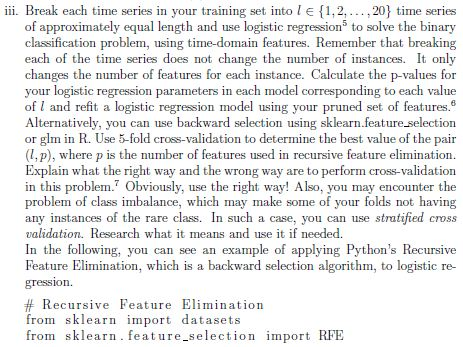 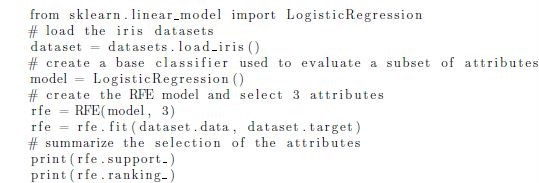

This is complex (at least for me!) so I'll break it down in parts:
* First I'll retrofit my previously used code to create 20 dataframes, one for each l value (I know this will burden the memory and isn't a scalable solution, but should work for this problem, and there is no explicit requirement that the solution os production ready)
* Second ??? (let's do #1 and then assess from there)

In [30]:
%%time
# Here we go again!

# dictionary to store ALL my dataframes
master_dict = {}

# Set range of l to loop through
l_range = np.arange(1, 21)

# Will be creating one dataframe per l in [1:20]
for l_split in l_range:

    # Create a master list containing all features for all csv's, then convert it to a dataframe
    # The list already follows the order of 'table_cols', listing all attributes of the first feature before going to the second
    master_list2 = []
    
    # Define the cutpoints 
    cutpoints = np.arange(0, l_split) + 1
    
    # Get the number of chunks, from which the chunk size (truncation) will be obtained
    n_chunks = max(cutpoints)

    # Loop through all CSVs (done one time for each dataframe to be created)
    for file in all_files:

        # Read the CSV 
        tmp = pd.read_csv(file, skiprows=5, header=None, sep=r'\s+|,')

        # Drop the first column with time data
        tmp.drop(0, axis=1, inplace=True)
              
        # Set the truncation length for splitting the dataframe parts
        truncation = len(tmp)//n_chunks

        # Temporary dataframe to store all parts from the csv file as they are being appended
        inner_df = pd.DataFrame()
        
        # For each cutpoint take a chunk/truncation of the dataframe and add it as columns to inner_df
        for cutpt in cutpoints:
            
            # Make a dataframe from the truncation range
            pt1 = tmp[(cutpt-1)*truncation:cutpt*truncation].reset_index(drop=True)

            # append it to the temporary inner_df (adding columns)
            inner_df = pd.concat(objs=[inner_df, pt1], axis=1, ignore_index=True)

        # Once all columns have been created
        # Extract the features from each variable (column)
        ft_min = pd.Series(inner_df.min().values)
        ft_max = pd.Series(inner_df.max().values)
        ft_mean = pd.Series(inner_df.mean().values)
        ft_median = pd.Series(inner_df.median().values)
        ft_std = pd.Series(inner_df.std().values)
        ft_firstq = pd.Series(inner_df.quantile(0.25).values)
        ft_thirdq = pd.Series(inner_df.quantile(0.75).values)

        # Put all the features in a dataframe
        # Each of the features (the 'ft_' pd.Series from above) will be a row, the columns will be each of the 6 variables in the CSV 
        df_tmp = pd.DataFrame(data=[ft_min, ft_max, ft_mean, ft_median, ft_std, ft_firstq, ft_thirdq])

        # The reason for converting to a dataframe of this hape is so that the .melt() method can be used, 
        # this allows the sequence to be converted...
        # from: the .min() of all variables, followed by the .max() of all varibles, then the .mean() of all and so on - this is how it would have been were I to merely append all 'ft_' pd.Series together
        # to: all features from variable 1, then all features from variable 2, then from variable 3 and so on - which is the desired format
        # The resulting pd.Series is now a ?-item long list ordered by variable, and not by 'ft_' feature - it has all the engineered features for one file and represents one row in the final dataframe
        df_tmp = df_tmp.melt()
        df_tmp = pd.Series(df_tmp['value'])

        # Then append the data already in the correct order to the master_list which will be used to make the final dataframe
        master_list2.append(df_tmp)

    # Now that the loop is over (for all files for one given l_split), create the a dataframe from the master_list and add it to the master_dict
    df_features2 = pd.DataFrame(data=master_list2)
    df_features2.reset_index(inplace=True, drop=True)
    df_features2['is_bending'] = labels_bending
    master_dict[l_split] = df_features2

Wall time: 45.6 s


There are seven features: min, max, mean, median, std, firstq, thirdq.

There are six variables: avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23

The base dataframe has one row per csv file with sample data, resulting in 88 rows (there are 88 CSVs). This never changes across dataframes. The base dataframe has one column for each combination of those (6x7), resulting in 42 columns.

For each increase in **l** the number os variables increases by 6, which means that the number of combinations increase by 42, which means that the number of columns increase by 42.

Hence the first dataframe at master_dict[1] will have 42 columns (42 x 01 = 42)

The last dataframe at master_dict[20] will have 840 columns (42 x 20 = 840)

All dataframes have one more column, which is the 'is_bending' label related to the binary classification problem.

In [31]:
print(f'master_dict[1].shape: {master_dict[1].shape}')
print(f'master_dict[20].shape: {master_dict[20].shape}')

master_dict[1].shape: (88, 43)
master_dict[20].shape: (88, 841)


In [32]:
# Create arrays of variable length to properly name the dataframes

# Dictionary to store the names for each dataframes
dict_col_names = {}

# The number of variables increase by 6 for each successive dataframe
variable_count = np.arange(6, 121, 6)

# The features remain 7, but multiply the variables
name_list = ['min_', 'max_', 'mean_', 'median_', 'std_', 'firstq_', 'thirdq_']

for idx, var_num in enumerate(variable_count):
    idx += 1 # because master_dict starts at 1
    number_of_variables = np.arange(1, var_num+1)
    list_col_names = []
    for number in number_of_variables:
        for col_n in name_list:
            # The dataframes columns grow by 6*7 per iteration (number_of_variables * name_list)
            tmp_name = f'{col_n}{number}'
            list_col_names.append(tmp_name)
    list_col_names.append('is_bending')        
    dict_col_names[idx] = list_col_names

print(f'len(dict_col_names[1]: {len(dict_col_names[1])}')
print(f'len(dict_col_names[20]: {len(dict_col_names[20])}')

len(dict_col_names[1]: 43
len(dict_col_names[20]: 841


In [33]:
# Now rename all dataframes
for idx in range(1, 21):
    master_dict[idx].columns = dict_col_names[idx]

In [34]:
# Check result
master_dict[20].head(3)

,min_1,max_1,mean_1,median_1,std_1,firstq_1,thirdq_1,min_2,max_2,mean_2,...,firstq_119,thirdq_119,min_120,max_120,mean_120,median_120,std_120,firstq_120,thirdq_120,is_bending
0,39.00,40.67,39.673750,39.50,0.488439,39.4375,39.815,0.00,0.83,0.474583,...,30.00,30.625,0.0,0.94,0.227500,0.00,0.304634,0.0,0.43,1
1,41.75,44.25,43.437917,43.50,0.530987,43.4575,43.670,0.43,0.83,0.524583,...,31.31,33.000,0.0,1.50,0.332917,0.43,0.364220,0.0,0.44,1
2,40.00,45.00,43.513750,44.04,1.627673,42.1875,45.000,0.00,0.87,0.387500,...,36.00,36.000,0.0,1.30,0.183333,0.00,0.338586,0.0,0.43,1


In [35]:
# Now each dictionary has to be split in a training and testing parts
master_dict_test = {}
master_dict_train = {}

# Loop though each ditionary
for l_split in l_range: 
    
    # First need to append the file patchs to each dictionary, so they can be used for indexing
    master_dict[l_split]['fpath'] = all_files
                         
    # Then make the train/test split based on the list test_datasets
    df_test = master_dict[l_split][master_dict[l_split]['fpath'].isin(test_datasets)]
    df_train = master_dict[l_split][~master_dict[l_split]['fpath'].isin(test_datasets)]
    
    # Now drop the file paths from the train and test dataframes, as they aren't features to use during training
    df_test.drop(['fpath'], axis=1, inplace=True)
    df_train.drop(['fpath'], axis=1, inplace=True)    
        
    # And store them in the new dictionaries
    master_dict_test[l_split] = df_test
    master_dict_train[l_split] = df_train

In [36]:
# Check if shapes are correct
print(f'master_dict_test[1].shape: {master_dict_test[1].shape}')
print(f'master_dict_test[20].shape: {master_dict_test[20].shape}')
print(f'master_dict_train[1].shape: {master_dict_train[1].shape}')
print(f'master_dict_train[20].shape: {master_dict_train[20].shape}')

master_dict_test[1].shape: (19, 43)
master_dict_test[20].shape: (19, 841)
master_dict_train[1].shape: (69, 43)
master_dict_train[20].shape: (69, 841)


**Part #1 is done. All dataframes are prepared for training the Logistic Regression algorithms!**

**I'll choose to go the route of recursive feature elimination using cross-validation**

The ensure the CV won't be biased, the parameters will be kept the same, and it'll be done using only the training dataset, so as avoid data leakage from the test dataset, which would compromise the results.

The wrong approach to cross-validation is to first use the entire dataset to select the predictor variables and then afterwards run the CV with the variables already selected. This is problematic because the variables will have been selected with the model having access to all samples, effectively not having a validation dataset.

The right approach to cross-validation is to first split the data in K-folds, then afterwards select the predictor variables to be used, so that for each CV-fold the validation fold is the one used to select the predictor variables. That is, the right way is to first split the folds, then select the predictors based on the training folds, which means the predictors may vary between the CV iterations.

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [38]:
# Instance a Recursive Feature Eliminator which uses Cross-Validation
# Set n_jobs to -2 to use parallel processing but leaving 1 core spared, just in case...
rfecv = RFECV(estimator = LogisticRegression(penalty='none'), 
              min_features_to_select=1,
              scoring='accuracy',
              cv=StratifiedKFold(5),
              n_jobs=-1)

In [39]:
%%time
# Notice, this cell takes ~5 minutes

# Dicts to store the features and accuracies from each l-sized dataframe
dict_features = {}
acc_scores = {}

# Loop through all 'l_splits' in [1:20]
for l_split in tqdm(l_range):
    
    x = master_dict_train[l_split].iloc[:, :-1]
    y = master_dict_train[l_split].iloc[:, -1]
    
    rfecv.fit(x, y)
    
    boolean_mask = rfecv.support_ # This returns an array of boolean indicating which features were chosen
    
    # Filter the column names of the df using 'boolean_mask', so as to keep only the names of the chosen features (columns)
    # Those features will be the ones that resulted in the highest accuracy 
    # (if there's more than one identical accuracy scores, RFECV picks the one with the fewest features)
    # And store those features (column names) in a dictionary indexed by 'l_split'
    dict_features[l_split] = x.iloc[:, boolean_mask].columns
    # Store all accuracies obtained during recusive feature elimination for the given dataframe
    acc_scores[l_split] = rfecv.grid_scores_


Wall time: 4min 39s


From RFECV Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

**"grid_scores_ : array of shape [n_subsets_of_features]**

    The cross-validation scores such that grid_scores_[i] corresponds to the CV score of the i-th subset of features."
    
Restating it:
grid_scores_ at position [0] contains the accuracy using only 1 feature, at position [1] containts the accuracy using 2 features.
Implicitly, the 1, 2 or however many features it used to get that accuracy is always the combination of features that results in the best accuracy.

This information can be crossed by looking at dict_features at a given l_split (which will say which features were chosen for that l_split), and then checking the accuracy in acc_scores[l_split] in the item position which matches the number of features shown in dict_features[l_split].

Eg: 

dict_features[3] has: ['max_2', 'min_5', 'max_5', 'thirdq_5', 'thirdq_7', 'max_18'], which totals 6 features.

acc_scores[3] has a list of all accuracies, but when we look at the 6th item in that list (which will be index 5), we find that acc_scores[3][5] = 0.9857142857142858

This way, for each dataframe in l_splits, the chosen features and their related accuracy can be found

In [40]:
# 'dict_features' contains the features chosen for each value of 'l'
# For example, when l=3, the chosen features were:
dict_features[3]

Index(['max_2', 'min_5', 'max_5', 'thirdq_5', 'thirdq_7', 'max_18'], dtype='object')

In [41]:
# When l=3 and n_features=6 the score is: (filtering with [5] because indexation starts at 0)
acc_scores[3][5]

0.9857142857142858

In [42]:
# The dictionary returns the feature list with some weird formatting that has Index() wrapping it (see above)
# Use list comprehension to get a clean list of features per 'l'
# Note that unlike the other dictionaries which go [1:20], this list will go [0:19], since lists always start at index 0
list_features_clean = [list(dict_features.values())[i].values for i in range(20)]

In [43]:
# Summarize the number of features chosen per 'l' value
num_features_chosen = {}
for l_split in l_range:
    num_features_chosen[l_split] = len(dict_features[l_split])

In [44]:
# Now extract the accuracy score obtained from using the chosen features
best_acc_scores = {}

for k,v in num_features_chosen.items():
    
    # k markes the 'l' in 'l_range'
    # v means the number of features which produced the best score for a given k (aka for a given l_range, aka for a given dataframe)
    # Since v starts at 1, but the list indexing starts at 0, then position with the best accuracy will be v-1
    # This mean that eg: with 1 feature the realted accuracy is found in position 0
    # In the 'acc_scores' list will contain the accuracy_score assocaited with using the best v features
    best_acc_scores[k] = acc_scores[k][v-1]

In [45]:
# Summarizing it all in a dataframe
summary_df = pd.DataFrame()
summary_df['l_split'] = num_features_chosen.keys()
summary_df['accuracy'] = best_acc_scores.values()
summary_df['num_features_chosen'] = num_features_chosen.values()
summary_df['list_features_chosen'] = list_features_clean
summary_df

,l_split,accuracy,num_features_chosen,list_features_chosen
0,1,1.000000,4,"[thirdq_1, min_5, max_5, firstq_5]"
1,2,0.985714,14,"[max_1, max_2, firstq_3, min_5, max_5, mean_5,..."
2,3,0.985714,6,"[max_2, min_5, max_5, thirdq_5, thirdq_7, max_18]"
3,4,1.000000,18,"[max_1, max_2, min_3, min_5, max_5, mean_5, me..."
4,5,0.985714,20,"[min_3, min_5, max_5, mean_5, median_5, firstq..."
5,6,0.985714,20,"[min_3, max_5, mean_5, median_5, firstq_5, thi..."
6,7,0.985714,23,"[min_3, min_5, max_5, mean_5, firstq_5, thirdq..."
7,8,0.970330,24,"[max_5, mean_5, firstq_5, thirdq_5, max_7, min..."
8,9,0.985714,31,"[max_5, mean_5, firstq_5, thirdq_5, min_9, max..."
9,10,0.971429,20,"[max_5, min_11, mean_11, median_11, firstq_11,..."


### (iv) Confusion Matrix & ROC-AUC

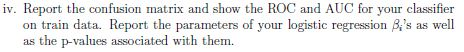

I'll chose to use the  model which had the best training accuracy, and since multiple models had a training accuracy of 1, I'll choose to select the one with the least engineered features, which happend to be when l = 1.

The dataset associated with this model can be found in master_dict_train[1].

In [46]:
# Getting the l_split associated with the best accuracy
selected_split_idx = np.argmax(summary_df['accuracy'])
selected_split_num = summary_df['l_split'][selected_split_idx]
selected_split_num

1

In [47]:
# Showing the model to be used
summary_df[summary_df.l_split==selected_split_num]

,l_split,accuracy,num_features_chosen,list_features_chosen
0,1,1.0,4,"[thirdq_1, min_5, max_5, firstq_5]"


In [48]:
# The best set of features for this dataset is:
selected_features = [i for i in summary_df[summary_df.l_split==selected_split_num]['list_features_chosen'].values[0]]
selected_features

['thirdq_1', 'min_5', 'max_5', 'firstq_5']

In [49]:
# Getting the dataframe associated with the chosen l_split
selected_df_train = master_dict_train[selected_split_num]

In [50]:
# Logistic regression for the selected dataset with the selected features
model_lr = LogisticRegression(penalty='none')

# Split x and y
x = selected_df_train[selected_features]
y = selected_df_train.iloc[:, -1]

# Train
model_lr.fit(x, y)

# Predict (also on train dataset)
pred_binary = model_lr.predict(x)
pred_probs = model_lr.predict_proba(x)
pred_logp = model_lr.predict_log_proba(x)

# One-hot encode y
true_onehot = [[1,0] if i==0 else [0,1] for i in y]

# ROC-AUC
roc_auc = roc_auc_score(true_onehot, pred_probs, average='micro')

In [51]:
print(f'The train dataset accuracy is: {model_lr.score(x, y)}')
print(f'The ROC AUC is {roc_auc}')

The train dataset accuracy is: 1.0
The ROC AUC is 1.0


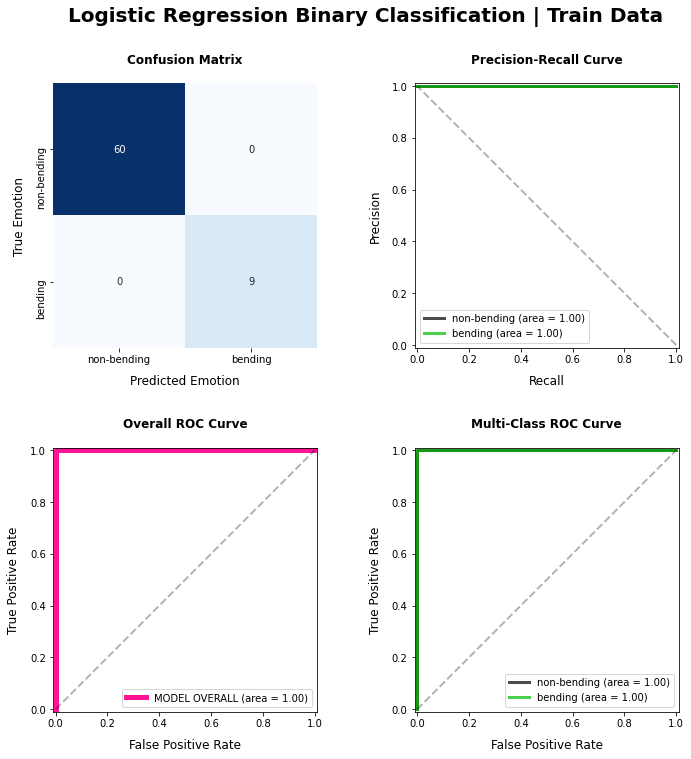

In [52]:
classes = ['non-bending', 'bending']
plot_classification_results(true_onehot, pred_probs, labels_binary_unique)
plt.suptitle('Logistic Regression Binary Classification | Train Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

In [53]:
# In order to get the regression betas and p-values need to use the logistic regression from statsmodels
# As scikit-learn doesn't have those retrievals implemented
import statsmodels.api as sm

In [54]:
# Train the statsmodels Logit regression
model_sm = sm.Logit(endog=y, exog=sm.add_constant(x))

# Fit the model
model_sm_fitted = model_sm.fit_regularized()

# Get the parameters names
logit_names = model_sm_fitted.params.index

# Get the params coefficients
logit_params = model_sm_fitted.params.values

# Get the p-values
logit_pvals_ = model_sm_fitted.pvalues.values

# When there's perfect classification, statsmodels will return np.NaN for p-values that are 0, converting those integer
logit_pvalues = np.zeros(len(logit_pvals_))
for idx, p in enumerate(logit_pvals_):
    if p > 0:
        logit_pvalues[idx] = p
    else:
        logit_pvalues[idx] = 0

Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.024642575047663e-11
            Iterations: 39
            Function evaluations: 46
            Gradient evaluations: 39


In [55]:
# Make a dataframe summarizing the Logistic Regression parameters
summary_logit = pd.DataFrame()
summary_logit['parameter'] = logit_names
summary_logit['coefficient'] = logit_params
summary_logit['p-value'] = logit_pvalues

summary_logit

,parameter,coefficient,p-value
0,const,-3.523199,1.0
1,thirdq_1,-29.350200,0.0
2,min_5,7.335411,0.0
3,max_5,24.516355,0.0
4,firstq_5,26.566349,0.0


The constant (beta0) has a p-value of 1, indicating that it is **not** significant.

All other parameters (betas) have a p-value small enough that it gets rounded to 0.

### (v) Test Dataset

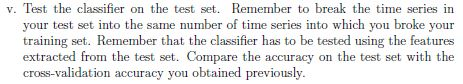

When I made all my l_splitted train dataset, I also made the test datasets, so now they only need to be retrieved.

They are stored in master_dict_test, indexed by [l_split]

In [56]:
print(f'Model was trained on master_dict_train[{selected_split_num}], of shape {master_dict_train[selected_split_num].shape}')
print()
print(f'Test set dataframe is master_dict_test[{selected_split_num}], of shape {master_dict_test[selected_split_num].shape}')

Model was trained on master_dict_train[1], of shape (69, 43)

Test set dataframe is master_dict_test[1], of shape (19, 43)


In [57]:
# Select the test dataset
selected_df_test = master_dict_test[selected_split_num]

In [58]:
# For the test dataset:
# Split x and y
x = selected_df_test[selected_features]
y = selected_df_test.iloc[:, -1]
# Predict on the test dataset
pred_binary = model_lr.predict(x)
pred_probs = model_lr.predict_proba(x)
pred_logp = model_lr.predict_log_proba(x)
# One-hot encode y
true_onehot = [[1,0] if i==0 else [0,1] for i in y]
# ROC-AUC
roc_auc = roc_auc_score(true_onehot, pred_probs, average='micro')

In [59]:
print(f'The test dataset accuracy is: {model_lr.score(x, y)}')
print(f'The ROC AUC is {roc_auc}')

The test dataset accuracy is: 1.0
The ROC AUC is 1.0


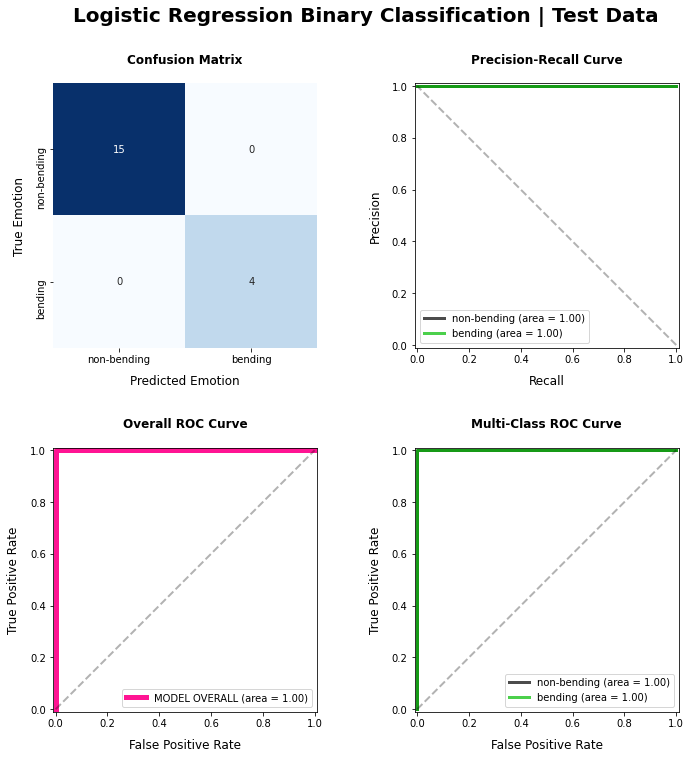

In [60]:
classes = ['non-bending', 'bending']
plot_classification_results(true_onehot, pred_probs, labels_binary_unique)
plt.suptitle('Logistic Regression Binary Classification | Test Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

The accuracy for both the cross-validated train dataset as well as the test dataset was the same, with both achieving 100% classification accuracy!

Equally, both train and test achieved a ROC-AUC of 1.0.

### (vi) Class Separation & Parameter Instability

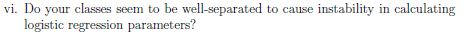

Yes. From the perfect classification accuracy it's evident that the classes are well-separated, causing instability in calculating the logistic regression parameters.

### (vii) Class Balance

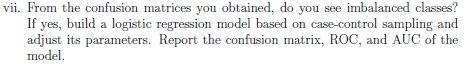

Yes, the classes are imbalanced. On the training daset there are 60 samples for non-bending (class 0) and only 9 for bending (class 1). In the training dataset there are 15 samples for non-bending (class 0) and only 4 for bending (class 1).

In [61]:
from sklearn.utils import resample

In [62]:
# Split the selected_df_train into sub-dataframes for each class, so that case-control sampling can be used
selected_df_train_1 = selected_df_train[selected_df_train.is_bending == 1]
selected_df_train_0 = selected_df_train[selected_df_train.is_bending == 0]

In [63]:
# Resample the dataframe for class 1 (bending) to get 60 samples
selected_df_train_1_bootstrapped = resample(selected_df_train_1, replace=True, n_samples=60, random_state=1)
# Make a new train dataset, now with balanced classes
selected_df_train_balanced = pd.concat([selected_df_train_1_bootstrapped, selected_df_train_0])
selected_df_train_balanced.shape

(120, 43)

In [64]:
# For the balanced dataset:
# Split x and y
x = selected_df_train_balanced[selected_features]
y = selected_df_train_balanced.iloc[:, -1]
# Train
model_lr.fit(x, y)
# Predict on the train dataset
pred_binary = model_lr.predict(x)
pred_probs = model_lr.predict_proba(x)
pred_logp = model_lr.predict_log_proba(x)
# One-hot encode y
true_onehot = [[1,0] if i==0 else [0,1] for i in y]
# ROC-AUC
roc_auc = roc_auc_score(true_onehot, pred_probs, average='micro')

In [65]:
print(f'The balanced dataset accuracy is: {model_lr.score(x, y)}')
print(f'The ROC AUC is {roc_auc}')

The balanced dataset accuracy is: 1.0
The ROC AUC is 1.0


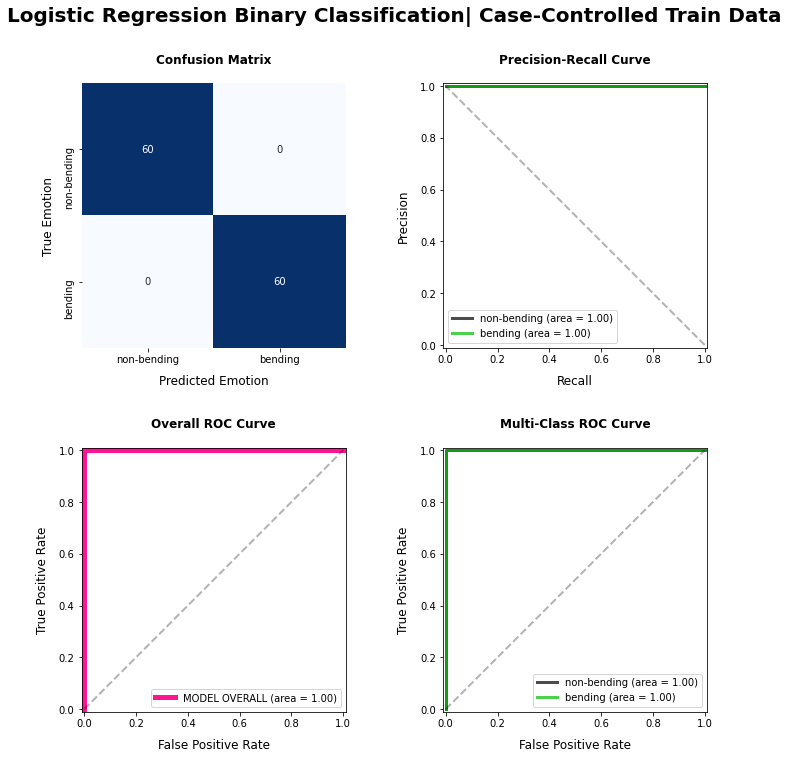

In [66]:
plot_classification_results(true_onehot, pred_probs, labels_binary_unique)
plt.suptitle('Logistic Regression Binary Classification | Case-Controlled Train Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

## (e) L1 Penalization

### (i) Best Features for each l ∈ {1,2,...,20} using L1 Penalization

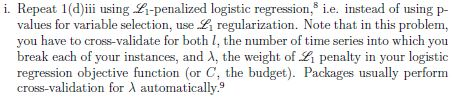

In [67]:
from sklearn.linear_model import LogisticRegressionCV

In [68]:
# Instance the Logistic Regression with 5 CVs, L1 Penalty and 'liblinear'
model_logit_l1 = LogisticRegressionCV(cv=StratifiedKFold(5), 
                                      penalty="l1", 
                                      solver="liblinear", 
                                      scoring='accuracy',
                                      n_jobs=-1,
                                      random_state=1)

In [69]:
%%time

# Dicts to store the features and accuracies from each l-sized dataframe
dict_features_l1_list = {}
dict_features_l1_num = {}
l1_C_weights = {}
l1_lambda_weights = {}
l1_accuracies = {}

# Loop through all 'l_splits' in [1:20]
for l_split in tqdm(l_range):

    # Split X and Y
    x = master_dict_train[l_split].iloc[:, :-1]
    y = master_dict_train[l_split].iloc[:, -1]
    
    # Train
    model_logit_l1.fit(x, y)
    
    # Convert the list of coefficient weights to a boolean list that merely indicated if the coefficient was used
    coefs_bool = []
    for i in model_logit_l1.coef_[0]:
        if i == 0:
            coefs_bool.append(False)
        else:
            coefs_bool.append(True)
    # Add an extra False at the end, to account for the label column
    coefs_bool.append(False)

    # Use the boolean list to get the features selected by the model
    dict_features_l1_list[l_split] = [i for i in master_dict_train[l_split].columns[coefs_bool]]
    
    # Append the count of chosen features to dict_features_l1_num
    dict_features_l1_num[l_split] = len(dict_features_l1_list[l_split])
     
    # Get the optimal value of C found by the model, putting it on the L1_C_weights dictionary
    # C = 1/λ
    l1_C_weights[l_split] = model_logit_l1.C_[0]
    
    # "model_logit_l1.Cs_" is the array with all C values tested on cross-valition, but no need to extract it here
    
    # And invert C to get the actual value for the penalty (λ) parameter
    l1_lambda_weights[l_split] = 1/l1_C_weights[l_split]
    
    # Get the model accuracy
    l1_accuracies[l_split] = model_logit_l1.score(x, y)


Wall time: 1.96 s


Notes on the C_ parameter 

**From scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html**

C_ : ndarray of shape (n_classes,) or (n_classes - 1,)

Array of C that maps to the best scores across every class. If refit is set to False, then for each class, the best C is the average of the C’s that correspond to the best scores for each fold. C_ is of shape(n_classes,) when the problem is binary.

Each of the values in Cs describes the inverse of regularization strength. Like in support vector machines, smaller values specify stronger regularization.

That is: C = 1/λ

**From Kaggle: https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression**

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

In [70]:
# Put the results into a dataframe for visualization
summary_l1 = pd.DataFrame()
summary_l1['l_split'] = l_range
summary_l1['accuracy'] = l1_accuracies.values()
summary_l1['error_rate'] = 1 - summary_l1['accuracy']
summary_l1['l1_C_weights'] = l1_C_weights.values()
summary_l1['l1_lambda_weights'] = l1_lambda_weights.values()
summary_l1['num_features_chosen'] = dict_features_l1_num.values()
summary_l1['list_features_chosen'] = dict_features_l1_list.values()

In [71]:
summary_l1

,l_split,accuracy,error_rate,l1_C_weights,l1_lambda_weights,num_features_chosen,list_features_chosen
0,1,1.0,0.0,0.359381,2.782559,5,"[thirdq_1, max_2, min_5, max_5, firstq_5]"
1,2,1.0,0.0,2.782559,0.359381,14,"[mean_1, median_1, firstq_1, max_2, firstq_3, ..."
2,3,1.0,0.0,2.782559,0.359381,16,"[max_1, median_1, thirdq_1, max_2, firstq_3, m..."
3,4,1.0,0.0,2.782559,0.359381,19,"[max_1, median_1, thirdq_1, max_2, min_3, firs..."
4,5,1.0,0.0,2.782559,0.359381,20,"[max_1, thirdq_1, min_3, median_3, min_5, max_..."
5,6,1.0,0.0,21.544347,0.046416,51,"[min_1, max_1, mean_1, median_1, firstq_1, thi..."
6,7,1.0,0.0,2.782559,0.359381,26,"[max_1, thirdq_1, min_3, max_5, mean_5, thirdq..."
7,8,1.0,0.0,10000.000000,0.000100,287,"[min_1, max_1, mean_1, median_1, std_1, firstq..."
8,9,1.0,0.0,0.359381,2.782559,10,"[max_5, median_11, thirdq_11, min_17, max_25, ..."
9,10,1.0,0.0,2.782559,0.359381,30,"[max_1, thirdq_1, min_3, max_5, max_7, thirdq_..."


Interestingly, using L1 penalization allowed all l_splits to achieve 100% accuracy on the training dataset

### (ii) Compare L1 Penalization with Recursive Feature Elimination

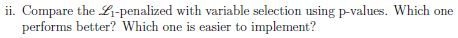

In [72]:
# Recalling the results table from using Recursive Feature Elimination
summary_df

,l_split,accuracy,num_features_chosen,list_features_chosen
0,1,1.000000,4,"[thirdq_1, min_5, max_5, firstq_5]"
1,2,0.985714,14,"[max_1, max_2, firstq_3, min_5, max_5, mean_5,..."
2,3,0.985714,6,"[max_2, min_5, max_5, thirdq_5, thirdq_7, max_18]"
3,4,1.000000,18,"[max_1, max_2, min_3, min_5, max_5, mean_5, me..."
4,5,0.985714,20,"[min_3, min_5, max_5, mean_5, median_5, firstq..."
5,6,0.985714,20,"[min_3, max_5, mean_5, median_5, firstq_5, thi..."
6,7,0.985714,23,"[min_3, min_5, max_5, mean_5, firstq_5, thirdq..."
7,8,0.970330,24,"[max_5, mean_5, firstq_5, thirdq_5, max_7, min..."
8,9,0.985714,31,"[max_5, mean_5, firstq_5, thirdq_5, min_9, max..."
9,10,0.971429,20,"[max_5, min_11, mean_11, median_11, firstq_11,..."


L1-penalized variable selection works better than Recursive Feature Elimination (my chosen approach for 1(d)iii), with L1-penalized being able to achieve 100% for all l ∈ {1,2,...,20} splits of the training dataset, which RFE wasn't able to. 

L1-penalized variable selection is also easier to implement, requiring only an extra argument on the LogisticRegression functions, and it also computes faster. Unlike p-value variable selection, this approach does not require refitting the model.

## (f) Multi-Class Classification

### (i) Find the best l ∈ {1,2,...,20} 

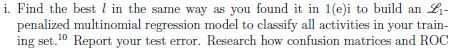 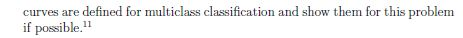

In [73]:
# A list containing multiclass labels was already created previously, under the variable ``labels``
# It was generated from the files path
# First, it need to be converted as to merge 'bending1' and 'bending2' into a single bending label
labels_new = ['bending' if 'bending' in label else label for label in labels]
labels_multiclass_unique = np.unique(labels_new)
len(labels_new)

88

In [74]:
labels_multiclass_unique

array(['bending', 'cycling', 'lying', 'sitting', 'standing', 'walking'],
      dtype='<U8')

In [75]:
# Now retrofit the master_dict, to add multiclass labels, and then split it into training and testing dictinaries
multiclass_dict_test = {}
multiclass_dict_train = {}

# First add the multiclass labels to each dataframe in master_dict
for l_split in l_range:  
    master_dict[l_split]['labels_multiclass'] = labels_new
    
    # Then make the train/test split based on the list test_datasets
    df_test = master_dict[l_split][master_dict[l_split]['fpath'].isin(test_datasets)]
    df_train = master_dict[l_split][~master_dict[l_split]['fpath'].isin(test_datasets)]    
    
    # Now drop the unused tag columns from train/test DFs, as they aren't features to use during training
    df_test.drop(['fpath', 'is_bending'], axis=1, inplace=True)
    df_train.drop(['fpath', 'is_bending'], axis=1, inplace=True)
    
    # And store them in the new dictionaries
    multiclass_dict_test[l_split] = df_test
    multiclass_dict_train[l_split] = df_train

In [76]:
# Check if shapes are correct
print(f'multiclass_dict_test[1].shape: {multiclass_dict_test[1].shape}')
print(f'multiclass_dict_test[20].shape: {multiclass_dict_test[20].shape}')
print(f'multiclass_dict_train[1].shape: {multiclass_dict_train[1].shape}')
print(f'multiclass_dict_train[20].shape: {multiclass_dict_train[20].shape}')

multiclass_dict_test[1].shape: (19, 43)
multiclass_dict_test[20].shape: (19, 841)
multiclass_dict_train[1].shape: (69, 43)
multiclass_dict_train[20].shape: (69, 841)


In [77]:
from sklearn.multiclass import OneVsRestClassifier

# Use OneVsRest to create one Logistic regression per class
ovr_classifier = OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5), 
                                                          penalty="l1", 
                                                          solver="liblinear", 
                                                          scoring='accuracy',
                                                          n_jobs=-1,
                                                          random_state=1))

In [78]:
# One Hot Encoder for y
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
OHE.fit(np.array(labels_new).reshape(-1, 1))

OneHotEncoder(sparse=False)

In [79]:
%%time

# Dicts to store the features and accuracies from each l-sized dataframe
dict_features_l1_list = {}
dict_features_l1_num = {}
l1_C_weights = {}
l1_lambda_weights = {}
l1_accuracies = {}

# Loop through all 'l_splits' in [1:20]
for l_split in tqdm(l_range):

    # Split X and Y
    x = multiclass_dict_train[l_split].iloc[:, :-1]
    y = multiclass_dict_train[l_split].iloc[:, -1]
    
    # One-Hot-Encode Y
    y = OHE.transform(y.values.reshape(-1, 1))
    
    # Train
    ovr_classifier.fit(x, y)
    
    # Convert the list of coefficient weights to a boolean list that merely indicated if the coefficient was used
    coefs_bool = []
    for i in ovr_classifier.coef_[0]:
        if i == 0:
            coefs_bool.append(False)
        else:
            coefs_bool.append(True)
    # Add an extra False at the end, to account for the label column
    coefs_bool.append(False)

    # Use the boolean list to get the features selected by the model
    dict_features_l1_list[l_split] = [i for i in multiclass_dict_train[l_split].columns[coefs_bool]]

    # Append the count of chosen features to dict_features_l1_num
    dict_features_l1_num[l_split] = len(dict_features_l1_list[l_split])
    
    # There is one C_ for each class estimator in ovr_classifier.estimators_[0]
    # Calculating the average C_ for reporting
    avg_c = 0
    for estimator in range(len(ovr_classifier.estimators_)):
        avg_c += ovr_classifier.estimators_[estimator].C_
    avg_c = avg_c/len(ovr_classifier.estimators_)
     
    # Get the optimal value of C found by the model, putting it on the L1_C_weights dictionary
    # C = 1/λ
    l1_C_weights[l_split] = avg_c[0]
    
    # "model_logit_l1.Cs_" is the array with all C values tested on cross-valition, but no need to extract it here
    
    # And invert C to get the actual value for the penalty (λ) parameter
    l1_lambda_weights[l_split] = 1/l1_C_weights[l_split]
    
    # Get the model accuracy
    l1_accuracies[l_split] = ovr_classifier.score(x, y)


Wall time: 11.5 s


In [80]:
# Put the results into a dataframe for visualization
summary_multiclass = pd.DataFrame()
summary_multiclass['l_split'] = l_range
summary_multiclass['accuracy'] = l1_accuracies.values()
summary_multiclass['error_rate'] = 1 - summary_multiclass['accuracy']
summary_multiclass['average_C_weights'] = l1_C_weights.values()
summary_multiclass['average_lambda_weights'] = l1_lambda_weights.values()
summary_multiclass['num_features_chosen'] = dict_features_l1_num.values()
summary_multiclass['list_features_chosen'] = dict_features_l1_list.values()

In [81]:
summary_multiclass

,l_split,accuracy,error_rate,average_C_weights,average_lambda_weights,num_features_chosen,list_features_chosen
0,1,0.652174,0.347826,1670.377218,0.000599,5,"[thirdq_1, max_2, min_5, max_5, firstq_5]"
1,2,0.826087,0.173913,3340.978559,0.000299,14,"[mean_1, median_1, firstq_1, max_2, firstq_3, ..."
2,3,0.652174,0.347826,59.657869,0.016762,16,"[max_1, median_1, thirdq_1, max_2, firstq_3, m..."
3,4,1.000000,0.000000,486.643563,0.002055,19,"[max_1, median_1, thirdq_1, max_2, min_3, firs..."
4,5,0.826087,0.173913,271.385302,0.003685,20,"[max_1, thirdq_1, min_3, median_3, min_5, max_..."
5,6,0.652174,0.347826,434.167210,0.002303,51,"[min_1, max_1, mean_1, median_1, firstq_1, thi..."
6,7,1.000000,0.000000,1726.384399,0.000579,26,"[max_1, thirdq_1, min_3, max_5, mean_5, thirdq..."
7,8,0.826087,0.173913,3388.996598,0.000295,287,"[min_1, max_1, mean_1, median_1, std_1, firstq..."
8,9,0.826087,0.173913,3548.711421,0.000282,10,"[max_5, median_11, thirdq_11, min_17, max_25, ..."
9,10,0.652174,0.347826,3337.387851,0.000300,30,"[max_1, thirdq_1, min_3, max_5, max_7, thirdq_..."


In [82]:
# Since multiple models achieved an error_rate of 0, I'll choose the l_slit with least engineered features which had error of 0
idx_best_l = np.argmin(summary_multiclass['error_rate'])
multiclass_chosen_l = summary_multiclass.iloc[idx_best_l]['l_split']
print(f'Will use an l of {multiclass_chosen_l}')

Will use an l of 4


In [83]:
# Now predict with a model using the multiclass_chosen_l

# Split X and Y
x = multiclass_dict_train[multiclass_chosen_l].iloc[:, :-1]
y = multiclass_dict_train[multiclass_chosen_l].iloc[:, -1]

# One-Hot-Encode Y
y = OHE.transform(y.values.reshape(-1, 1))

# Train
ovr_classifier.fit(x, y)

# Predict (also on train dataset)
pred_onehot= ovr_classifier.predict(x)
pred_probs = ovr_classifier.predict_proba(x)

# Set a more obvious name for y
true_onehot = y.copy()

# And finally, retrieve the decoded labels
true_labels = OHE.inverse_transform(true_onehot).flatten()
pred_labels = OHE.inverse_transform(pred_onehot).flatten()

unique_labels = np.unique(true_labels)

In [84]:
# And get train error
train_acc = ovr_classifier.score(x, y)
train_error = 1 - train_acc
print(f'Train error: {train_error}')

Train error: 0.0


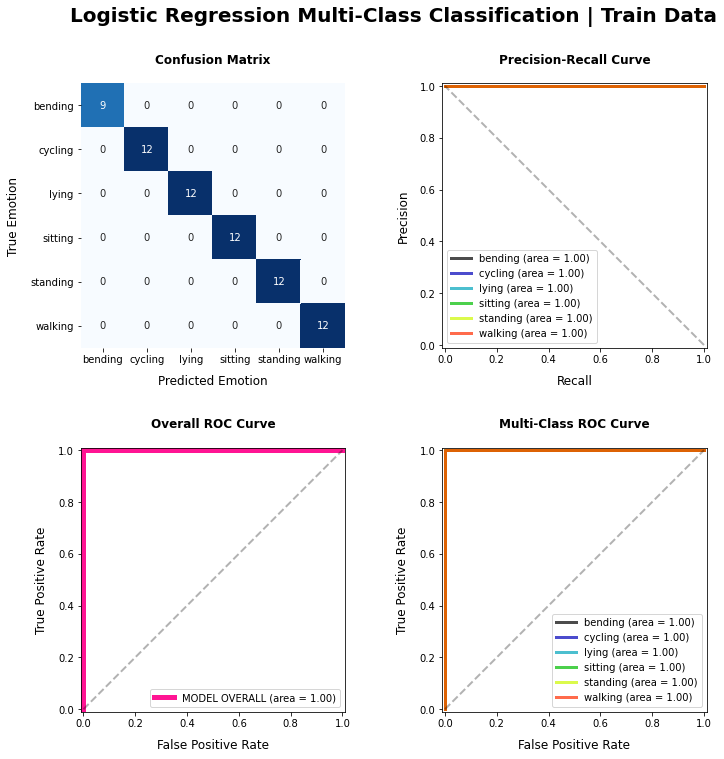

In [85]:
plot_classification_results(true_onehot, pred_probs, classes=labels_multiclass_unique)
plt.suptitle('Logistic Regression Multi-Class Classification | Train Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

**Now repeating everything for the test dataset**

In [86]:
# Now predict on the test dataset
# Split X and Y
x = multiclass_dict_test[multiclass_chosen_l].iloc[:, :-1]
y = multiclass_dict_test[multiclass_chosen_l].iloc[:, -1]
# One-Hot-Encode Y
y = OHE.transform(y.values.reshape(-1, 1))
# Predict 
pred_onehot = ovr_classifier.predict(x)
pred_probs = ovr_classifier.predict_proba(x)
# Set a more obvious name for y
true_onehot = y.copy()
# And finally, retrieve the decoded labels
true_labels = OHE.inverse_transform(true_onehot).flatten()
pred_labels = OHE.inverse_transform(pred_onehot).flatten()
unique_labels = np.unique(true_labels)

In [87]:
# And get test error
test_acc = ovr_classifier.score(x, y)
test_error = 1 - test_acc
print(f'Test error: {test_error}')

Test error: 0.368421052631579


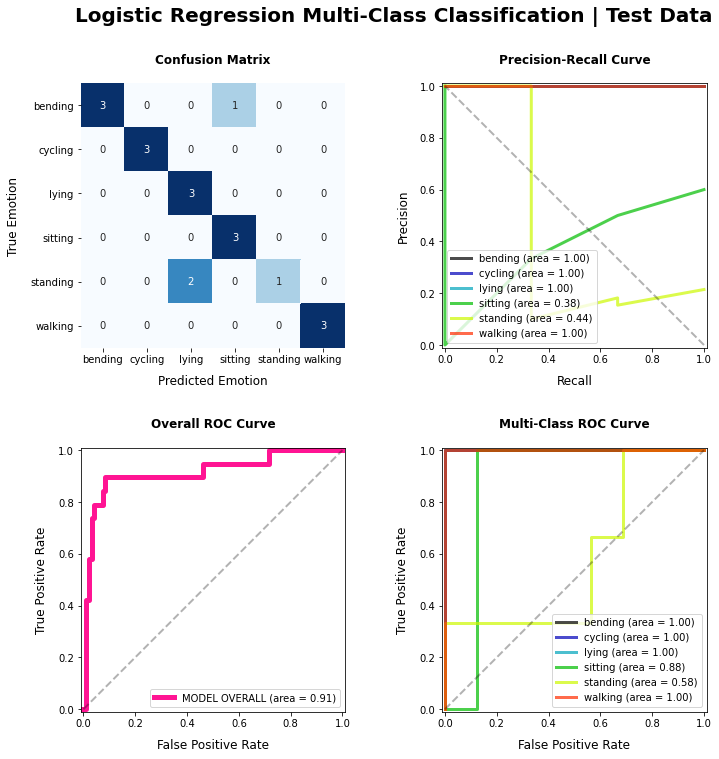

In [88]:
plot_classification_results(true_onehot, pred_probs, classes=labels_multiclass_unique)
plt.suptitle('Logistic Regression Multi-Class Classification | Test Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

### (ii) Naïve Bayes Multiclass Classifier

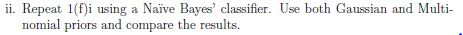

#### Gaussian

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [90]:
%%time

# Instanciate the model
model_GNB = GaussianNB()

# Dicts to store the features and accuracies from each l-sized dataframe
GNB_accuracies_train = {}
GNB_accuracies_test = {}

# Loop through all 'l_splits' in [1:20]
for l_split in l_range:
    
    # Split X and Y
    x = multiclass_dict_train[l_split].iloc[:, :-1]
    y = multiclass_dict_train[l_split].iloc[:, -1]
    
    # Cross-Validate and get training error
    GNB_score = cross_val_score(model_GNB, x, y, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1)
    
    # Get the train accuracy
    GNB_accuracies_train[l_split] = GNB_score.mean()
    
    # To get the test error, need to first need to fit the model on the training data
    # cross_val_score does not fit the instantiated model, so the untrained model cannot predict on test
    model_GNB.fit(x, y)
    
    # Change x and y to the test dataset
    x = multiclass_dict_test[l_split].iloc[:, :-1]
    y = multiclass_dict_test[l_split].iloc[:, -1]
    
    # Get the test accuracy
    GNB_accuracies_test[l_split] = model_GNB.score(x, y)

Wall time: 2.13 s


In [91]:
summary_GNB = pd.DataFrame()
summary_GNB['l_split'] = l_range
summary_GNB['accuracy_train_CV'] = GNB_accuracies_train.values()
summary_GNB['error_rate_train_CV'] = 1 - summary_GNB['accuracy_train_CV'] 
summary_GNB['accuracy_test'] = GNB_accuracies_test.values()
summary_GNB['error_rate_test'] = 1 - summary_GNB['accuracy_test'] 
summary_GNB

,l_split,accuracy_train_CV,error_rate_train_CV,accuracy_test,error_rate_test
0,1,0.851648,0.148352,0.894737,0.105263
1,2,0.856044,0.143956,0.842105,0.157895
2,3,0.740659,0.259341,0.789474,0.210526
3,4,0.695604,0.304396,0.894737,0.105263
4,5,0.710989,0.289011,0.894737,0.105263
5,6,0.725275,0.274725,0.789474,0.210526
6,7,0.668132,0.331868,0.842105,0.157895
7,8,0.754945,0.245055,0.789474,0.210526
8,9,0.594505,0.405495,0.789474,0.210526
9,10,0.623077,0.376923,0.842105,0.157895


In [92]:
# Pick the l-split with lowest train error (because using the test dataset would be cheating)
GNB_chosen_l_idx = np.argmin(summary_GNB['error_rate_train_CV'])
GNB_chosen_l = int(summary_GNB.iloc[GNB_chosen_l_idx]['l_split'])
GNB_chosen_l

2

In [93]:
# With the chosen l, train the model and make predictions to plot ROC-AUC and Confusion Matrix

# Split X and Y
x = multiclass_dict_train[GNB_chosen_l].iloc[:, :-1]
y = multiclass_dict_train[GNB_chosen_l].iloc[:, -1]
# Train
model_GNB.fit(x, y)
# Change x and y to the test dataset
x = multiclass_dict_test[GNB_chosen_l].iloc[:, :-1]
y = multiclass_dict_test[GNB_chosen_l].iloc[:, -1]
# Get the test accuracy
pred_probs = model_GNB.predict_proba(x)
pred_labels = model_GNB.predict(x)
# Convert y to the necessary formats to plot
true_onehot = OHE.transform(y.values.reshape(-1, 1))
true_labels = y.copy()
unique_labels = np.unique(true_labels)

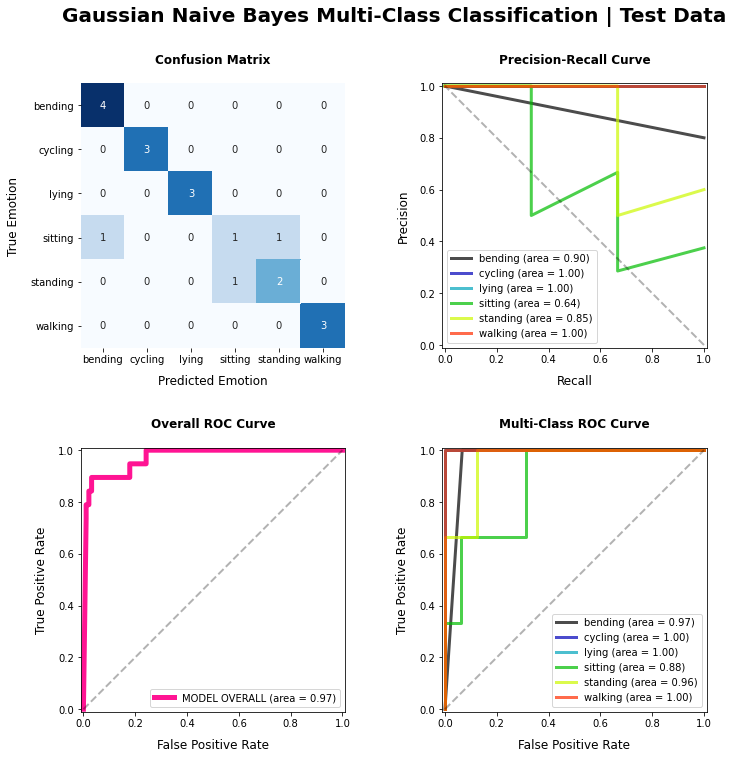

In [94]:
plot_classification_results(true_onehot, pred_probs, classes=labels_multiclass_unique)
plt.suptitle('Gaussian Naive Bayes Multi-Class Classification | Test Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

In [95]:
print(f'The selected Gaussian Naïve Bayes model during training achieved a test error rate of: {summary_GNB.iloc[GNB_chosen_l_idx]["error_rate_test"]}')

The selected Gaussian Naïve Bayes model during training achieved a test error rate of: 0.1578947368421053


It's important to notice that well testing all possible l_splits, the lowest test error was actually achieved by models which hadn't had the lowest training error. That is why the chosen model, which was chosen based on training data, did not have the best performance on testing data.

**Multinomial**

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
%%time

# Instantiate the model
model_MNB = MultinomialNB()

# Dicts to store the features and accuracies from each l-sized dataframe
MNB_accuracies_train = {}
MNB_accuracies_test = {}

# Loop through all 'l_splits' in [1:20]
for l_split in l_range:

    # Split X and Y
    x = multiclass_dict_train[l_split].iloc[:, :-1]
    y = multiclass_dict_train[l_split].iloc[:, -1]
    
    # Cross-Validate
    MNB_score = cross_val_score(model_MNB, x, y, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1).mean()
   
    # Get the train accuracy
    MNB_accuracies_train[l_split] = MNB_score
    
    # To get the test error, need to first need to fit the model on the training data
    # cross_val_score does not fit the instantiated model, so the untrained model cannot predict on test
    model_MNB.fit(x, y)   
    
    # Change x and y to the test dataset
    x = multiclass_dict_test[l_split].iloc[:, :-1]
    y = multiclass_dict_test[l_split].iloc[:, -1]
    
    # Get the test accuracy
    MNB_accuracies_test[l_split] = model_MNB.score(x, y)    

Wall time: 1.58 s


In [98]:
summary_MNB = pd.DataFrame()
summary_MNB['l_split'] = l_range
summary_MNB['accuracy_train_CV'] = MNB_accuracies_train.values()
summary_MNB['error_rate_train_CV'] = 1 - summary_MNB['accuracy_train_CV'] 
summary_MNB['accuracy_test'] = MNB_accuracies_test.values()
summary_MNB['error_rate_test'] = 1 - summary_MNB['accuracy_test'] 
summary_MNB

,l_split,accuracy_train_CV,error_rate_train_CV,accuracy_test,error_rate_test
0,1,0.810989,0.189011,0.894737,0.105263
1,2,0.812088,0.187912,0.842105,0.157895
2,3,0.796703,0.203297,0.842105,0.157895
3,4,0.812088,0.187912,0.842105,0.157895
4,5,0.840659,0.159341,0.842105,0.157895
5,6,0.840659,0.159341,0.842105,0.157895
6,7,0.854945,0.145055,0.842105,0.157895
7,8,0.840659,0.159341,0.842105,0.157895
8,9,0.840659,0.159341,0.842105,0.157895
9,10,0.840659,0.159341,0.842105,0.157895


In [99]:
# Pick the l-split with lowest train error (because using the test dataset would be cheating)
MNB_chosen_l_idx = np.argmin(summary_MNB['error_rate_train_CV'])
MNB_chosen_l = int(summary_MNB.iloc[MNB_chosen_l_idx]['l_split'])
MNB_chosen_l

7

In [100]:
# With the chosen l, train the model and make predictions to plot ROC-AUC and Confusion Matrix

# Split X and Y
x = multiclass_dict_train[MNB_chosen_l].iloc[:, :-1]
y = multiclass_dict_train[MNB_chosen_l].iloc[:, -1]
# Train
model_MNB.fit(x, y)
# Change x and y to the test dataset
x = multiclass_dict_test[MNB_chosen_l].iloc[:, :-1]
y = multiclass_dict_test[MNB_chosen_l].iloc[:, -1]
# Get the test accuracy
pred_probs = model_MNB.predict_proba(x)
pred_labels = model_MNB.predict(x)
# Convert y to the necessary formats to plot
true_onehot = OHE.transform(y.values.reshape(-1, 1))
true_labels = y.copy()
unique_labels = np.unique(true_labels)

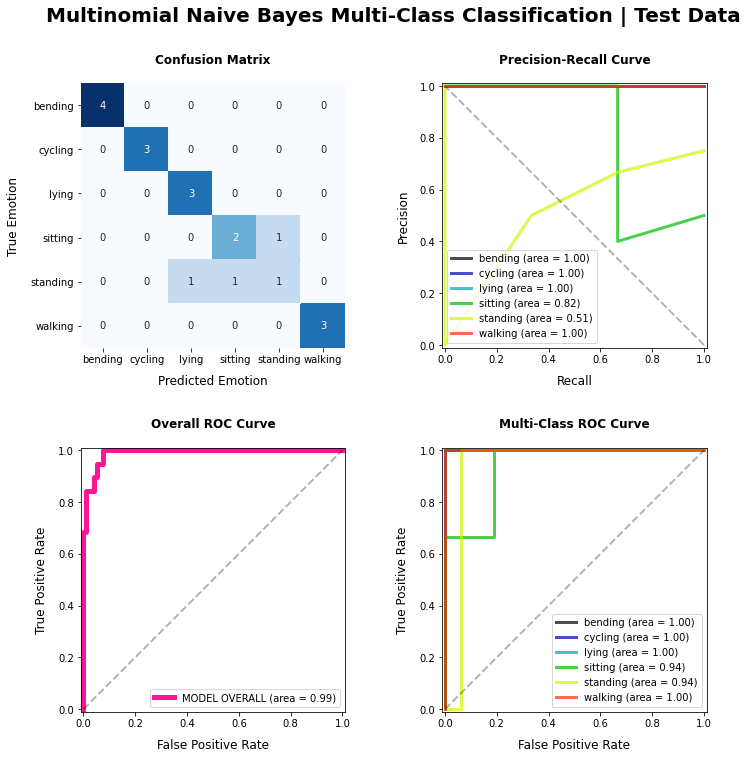

In [101]:
plot_classification_results(true_onehot, pred_probs, classes=labels_multiclass_unique)
plt.suptitle('Multinomial Naive Bayes Multi-Class Classification | Test Data', y=1.05, fontsize=20, fontweight='bold')
plt.show()

In [102]:
print(f'The selected Multinomial Naïve Bayes model during training achieved a test error rate of: {summary_MNB.iloc[MNB_chosen_l_idx]["error_rate_test"]}')

The selected Multinomial Naïve Bayes model during training achieved a test error rate of: 0.1578947368421053


It's important to notice that when testing all possible l_splits, the lowest test error was actually achieved by models which hadn't had the lowest training error. That is why the chosen model, which was chosen based on training data, did not have the best performance on testing data.

### (iii) Best Performing Naïve Bayes Method

Both models performed similarly, with both achieving equal error rate on the test dataset. Yet, when considering the roc-auc-curve, which account for the assigned probabilities, the Multinomial Naïve Bayes model performed slightly better.